In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

0
10
20
30
40
50
60
70
80
90
# of nodes : 96


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:33: ComplexWarning: Casting complex values to real discards the imaginary part


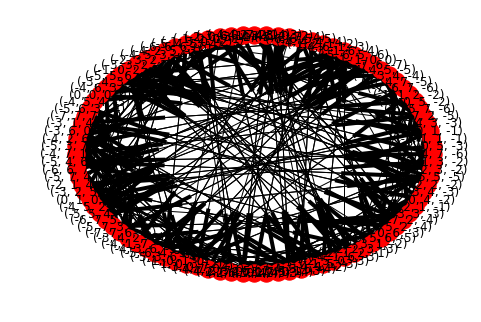

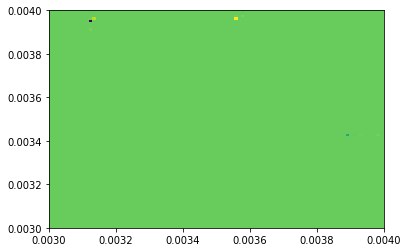

In [96]:
import dot_classifier
reload(dot_classifier)
import thomas_fermi
reload(thomas_fermi)
import markov_graph
reload(markov_graph)

N_v_points = 100
V_d_vec = np.linspace(3e-3,4e-3,N_v_points)
I_vec = np.zeros((N_v_points,N_v_points))

x = np.arange(4)
K = thomas_fermi.create_K_matrix(x,E_scale=0.5e-3)

graph_model = (7,1)
battery_weight = 1000
kT = 10e-6
mu_l = (10e-3+0.1e-3,10e-3)

for i in range(N_v_points):
    if(i % 10 == 0):
        print i
    for j in range(N_v_points):
        V = np.array([5e-3,V_d_vec[i],V_d_vec[j],5e-3])
            
        physics = (x,V,K,mu_l,battery_weight,kT)
        # generate graph only on first call
        if (i==0 and j==0):
            G = markov_graph.generate_graph(graph_model, physics)
        else:
            G = markov_graph.recalculate_weights(G,physics)  
            
        I_vec[i,j] = markov_graph.get_current(G)

print "# of nodes :",len(list(G.nodes(data=True)))
#print G.edges(data=True)

plt.figure(1)
nx.draw_shell(G,with_labels=True)

plt.figure(2)
XX,YY = np.meshgrid(V_d_vec,V_d_vec)
plt.pcolor(XX,YY,I_vec)


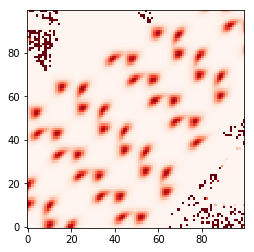

In [97]:
plt.imshow(I_vec,vmin=0,vmax=1e-4,cmap=plt.get_cmap('Reds'),origin='lower')
plt.show()


In [87]:
for i in range(50):
    for j in range(50):
        if I_vec[i,j] > 1e-3:
            I_vec[i,j] = 0.0

In [29]:
print G.edges(data=True)

[((-1, 1, 2, -2), (-1, 2, 1, -2), {'battery_edge': 'False', 'weight': 0.50000000000010414}), ((-1, 1, 2, -2), (-2, 2, 2, -2), {'battery_edge': 'False', 'weight': 0.98728867150206767}), ((-1, 1, 2, -2), (-1, 1, 1, -1), {'battery_edge': 'False', 'weight': 8.6167122265778668e-05}), ((-1, 2, 1, -2), (-1, 1, 2, -2), {'battery_edge': 'False', 'weight': 0.49999999999989586}), ((-1, 2, 1, -2), (-1, 2, 0, -1), {'battery_edge': 'False', 'weight': 1.7756224307926012e-06}), ((-1, 1, 1, -1), (-1, 1, 2, -2), {'battery_edge': 'False', 'weight': 0.99991383287773428}), ((-1, 1, 1, -1), (0, 0, 1, -1), {'battery_edge': 'False', 'weight': 1.1884573822410975e-08}), ((-1, 1, 1, -1), (-1, 2, 0, -1), {'battery_edge': 'False', 'weight': 0.020188994720231276}), ((-1, 1, 1, -1), (-2, 2, 1, -1), {'battery_edge': 'False', 'weight': 0.99991383287773428}), ((-1, 1, 1, -1), (-1, 1, 0, 0), {'battery_edge': 'False', 'weight': 1.1884573822409327e-08}), ((-1, 1, 1, -1), (-1, 0, 2, -1), {'battery_edge': 'False', 'weight':

In [159]:
I_vec[25,10]

7688.3907620507262

In [16]:
G.edges(data="True")[0]

((-8, 10, 5, -7), (-7, 10, 5, -8), None)

In [40]:
print G.nodes()

[(-8, 10, 5, -7), (-5, 4, 7, -6), (-2, 0, 5, -3), (-1, 1, 1, -1), (0, 0, 1, -1), (-4, 4, 3, -3), (-7, 8, 7, -8), (-4, 7, 2, -5), (-7, 8, 5, -6), (-8, 8, 7, -7), (-7, 10, 3, -6), (-10, 9, 10, -9), (-6, 5, 7, -6), (-3, 0, 5, -2), (-9, 10, 7, -8), (-1, 1, 2, -2), (-7, 6, 7, -6), (-6, 4, 9, -7), (-6, 4, 7, -5), (-6, 10, 3, -7), (-3, 3, 4, -4), (-4, 4, 5, -5), (-6, 7, 6, -7), (-5, 1, 10, -6), (-1, 1, 0, 0), (-5, 6, 5, -6), (-5, 9, 1, -5), (-3, 1, 6, -4), (-4, 6, 1, -3), (-7, 5, 10, -8), (-1, 2, 1, -2), (-9, 7, 10, -8), (-6, 10, 1, -5), (-4, 4, 4, -4), (-6, 6, 5, -5), (-6, 4, 8, -6), (-8, 9, 8, -9), (-10, 10, 10, -10), (-6, 1, 10, -5), (-5, 0, 10, -5), (-4, 0, 9, -5), (-6, 9, 2, -5), (-5, 2, 7, -4), (-3, 5, 0, -2), (-4, 9, 0, -5), (-2, 4, 1, -3), (-4, 6, 2, -4), (-4, 0, 7, -3), (-7, 10, 5, -8), (-6, 2, 9, -5), (-3, 6, 1, -4), (-2, 0, 3, -1), (-8, 8, 8, -8), (-7, 6, 9, -8), (-8, 7, 8, -7), (-4, 8, 1, -5), (-1, 2, 0, -1), (-7, 5, 8, -6), (-1, 3, 0, -2), (-5, 9, 2, -6), (-7, 8, 6, -7), (-5, 4, 